In [1]:
import os
import gc
import re
import ast
import sys
import copy
import json
import time
import math
import string
import pickle
import random
import joblib
import itertools
import warnings
warnings.filterwarnings("ignore")

import scipy as sp
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm

from parameters import *
from autoencoder import *
from utils import *

In [2]:
train = pd.read_csv(TRAIN_DIR).dropna()
if TRAIN_EMBEDDING in os.listdir():
    X_train = embed(train['full_text'].to_list(), read_dir=TRAIN_EMBEDDING)
else:
    X_train = embed(train['full_text'].to_list(), save_dir=TRAIN_EMBEDDING)

y_train = train[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].values

In [3]:
test = pd.read_csv(TEST_DIR).dropna()
if TEST_EMBEDDING in os.listdir():
    X_test = embed(test['full_text'].to_list(), read_dir=TEST_EMBEDDING)
else:
    X_test = embed(test['full_text'].to_list(), save_dir=TEST_EMBEDDING)

In [8]:
# for test purposes

from sklearn.svm import SVR

y_preds = []
# submission = [test['text_id']]
for i in range(y_train.shape[1]):
    reg = SVR()
    reg.fit(X_train, y_train[:, i])
    y_preds.append(reg.predict(X_train))
    print(f'RMSE for col {i}: {RMSE(y_train[:, i], y_preds[-1])}')
    # submission.append(reg.predict(X_test))

print(f'\nMCRMSE: {MCRMSE(y_train, np.array(y_preds))}')

RMSE for col 0: 0.42267517313488306
RMSE for col 1: 0.40021765087644456
RMSE for col 2: 0.36043785694102554
RMSE for col 3: 0.41153933599457726
RMSE for col 4: 0.4525394441497808
RMSE for col 5: 0.4177584700487179

MCRMSE: 0.3487407169760393


In [ ]:
from semisupervised import SKTSVM

model = SKTSVM()
model.fit(np.vstack((label_X_train, unlabel_X_train)), np.append(label_y_train, unlabel_y))
# predict
predict = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predict)
# metric
print("accuracy", acc)

In [7]:
from model import *

reg = SVR()
reg.fit(X_train, y_train[:, 0], epochs=1000, learning_rate=0.9)
y_preds = reg.predict(X_train)

RMSE(y_train[:, 0], y_preds)

1/1000: loss: 31.17840576171875
2/1000: loss: 56.97697067260742
3/1000: loss: 238.42440795898438
4/1000: loss: 61.09438705444336
5/1000: loss: 234.78558349609375
6/1000: loss: 63.893619537353516
7/1000: loss: 231.4258270263672
8/1000: loss: 66.43192291259766
9/1000: loss: 228.39784240722656
10/1000: loss: 68.65986633300781
11/1000: loss: 225.6673583984375
12/1000: loss: 70.60682678222656
13/1000: loss: 223.0351104736328
14/1000: loss: 72.4659194946289
15/1000: loss: 220.46023559570312
16/1000: loss: 74.27637481689453
17/1000: loss: 217.9019012451172
18/1000: loss: 76.07852935791016
19/1000: loss: 215.3616180419922
20/1000: loss: 77.87157440185547
21/1000: loss: 212.84104919433594
22/1000: loss: 79.65461730957031
23/1000: loss: 210.34205627441406
24/1000: loss: 81.42662811279297
25/1000: loss: 207.86680603027344
26/1000: loss: 83.18644714355469
27/1000: loss: 205.4176025390625
28/1000: loss: 84.93278503417969
29/1000: loss: 202.9970245361328
30/1000: loss: 86.66414642333984
31/1000: los

161.4483480384493

In [3]:
from model import *
import numpy as np
from utils import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

labeled_X = np.load('labeled_data.npy')
unlabeled_X = np.load('unlabeled_data.npy')
y = np.load('labels.npy')

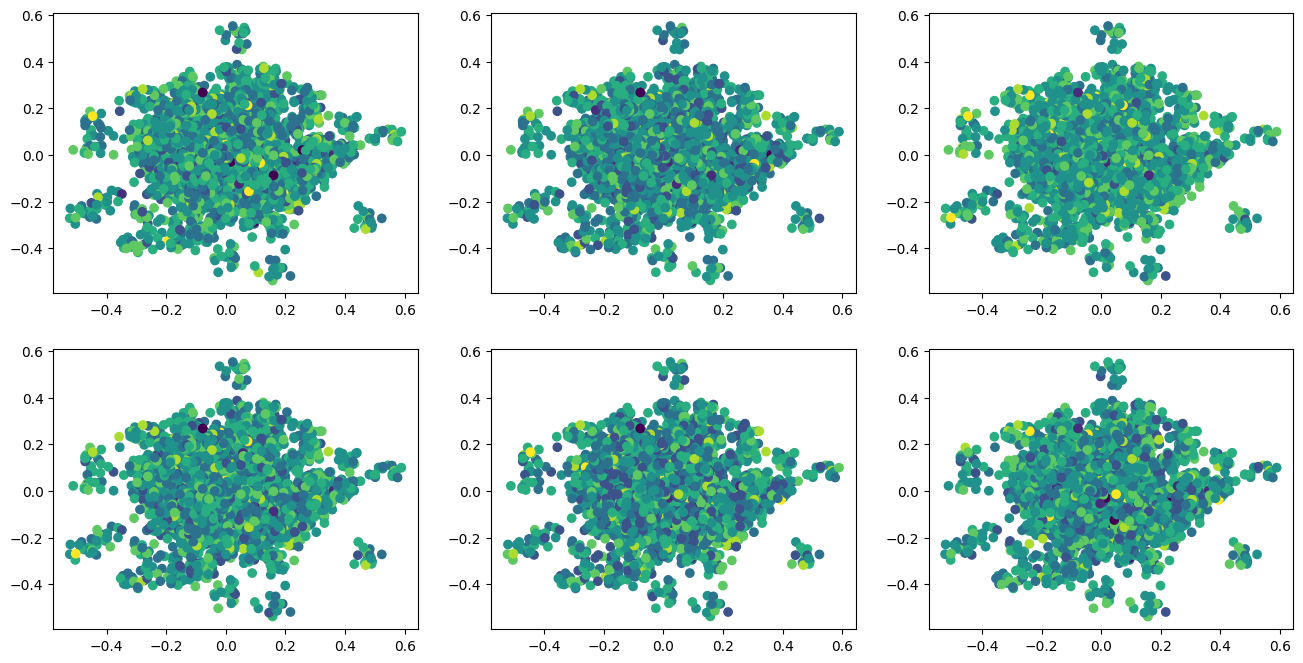

In [17]:
pca = PCA(n_components=2)
X = pca.fit_transform(labeled_X)
plt.figure(figsize=(16, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, i])
plt.show()